In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# automl 라이브러리 설치 _ 처음에만 실행
!pip install mljar-supervised

     ---------------------------------------- 0.0/126.8 kB ? eta -:--:--
     --- ------------------------------------ 10.2/126.8 kB ? eta -:--:--
     ------------------------- ------------- 81.9/126.8 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 126.8/126.8 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for xgboost>=2.0.0 from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for lightgbm>=3.0.0 from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for catboost>=0.24.4 from https://files.pythonhosted.org/packages/e8/37/3afd3c02798734efcd7840bfa872d3efc06f5d5c92f9613fea3ff5b431

In [ ]:
# 필요 패키지 로드
import matplotlib
matplotlib.use('Agg')

In [ ]:
# train data
x_train = tcgaf.drop(['y'], axis=1)
y_train = tcgaf['y']

# test data
x_test = urinef.drop(['y'], axis=1)
y_test = urinef['y']

In [ ]:
from supervised.automl import AutoML
automl = AutoML(
    mode="Compete",
    algorithms=['Random Forest', 'LightGBM', 'Xgboost', 'CatBoost','Neural Network','Extra Trees'],
    n_jobs=-1,
    total_time_limit=600, # 코드 돌리는 최대 시간 지정
    eval_metric="accuracy", # 평가 지표
    ml_task="binary_classification",
    features_selection=True,  # 특성 선택 활성화
    boost_on_errors=True,     # 오류에 대한 부스팅 활성화
)

In [ ]:
automl.fit(x_train, y_train)

AutoML directory: AutoML_4
The task is binary_classification with evaluation metric accuracy
AutoML will use algorithms: ['Random Forest', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Extra Trees']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree accuracy 0.9625 trained in 3.46 seconds
Disable stacking for split validation
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 6 models
2_Default_LightGBM accuracy 1.0 trained in 4.37 seconds
3_Default_Xgboost accuracy 1.0 trained in 2.75 seconds
4_Default_CatBoost accuracy 0.9875 trained in 5.14 seconds
5_Default_NeuralNetwork accura

Ensemble accuracy 1.0 trained in 4.08 seconds
AutoML fit time: 682.88 seconds
AutoML best model: 2_Default_LightGBM


AutoML(algorithms=['Random Forest', 'LightGBM', 'Xgboost', 'CatBoost',
                   'Neural Network', 'Extra Trees'],
       boost_on_errors=True, eval_metric='accuracy', features_selection=True,
       ml_task='binary_classification', mode='Compete', total_time_limit=600)

In [ ]:
# pred 값 추출
pred = automl.predict(x_test)

In [ ]:
# automl 모델 평가
from sklearn.metrics import accuracy_score
automl_accuracy = accuracy_score(y_test, pred)
print("AUTOML:", automl_accuracy)

AUTOML: 0.6142857142857143


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[41,  1],
       [26,  2]], dtype=int64)

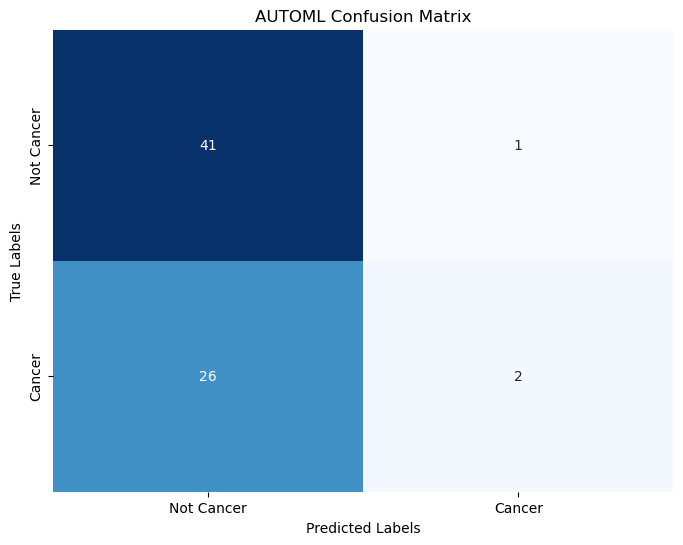

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# automl 모델의 confusion matrix 그리기
plt.figure(figsize=(8, 6))
automl_conf = confusion_matrix(y_test, pred)
sns.heatmap(automl_conf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("AUTOML Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(ticks=[0.5, 1.5], labels=["Not Cancer", "Cancer"])
plt.yticks(ticks=[0.5, 1.5], labels=["Not Cancer", "Cancer"])
plt.show()

In [ ]:
# 모델2
from supervised.automl import AutoML
automl = AutoML(
    mode="Compete",
    algorithms=['Random Forest', 'LightGBM', 'Xgboost', 'CatBoost','Neural Network','Extra Trees'],
    n_jobs=-1,
    total_time_limit=3600, # 코드 돌리는 최대 시간 지정
    eval_metric="accuracy", # 평가 지표
    ml_task="binary_classification",
    features_selection=True,  # 특성 선택 활성화
    boost_on_errors=True,     # 오류에 대한 부스팅 활성화
)

In [ ]:
automl.fit(x_train, y_train)

AutoML directory: AutoML_5
The task is binary_classification with evaluation metric accuracy
AutoML will use algorithms: ['Random Forest', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Extra Trees']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree accuracy 0.975 trained in 3.77 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 5-fold CV Shuffle,Stratify
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 6 models
1_Default_LightGBM accuracy 0.974906 trained in 22.92 seconds
2_Default_Xgboost accuracy 0.976161 trained in 16.43 seconds
3_Default_CatBoost accurac

64_CatBoost accuracy 0.977415 trained in 37.06 seconds
65_LightGBM accuracy 0.97867 trained in 12.27 seconds
66_LightGBM accuracy 0.97867 trained in 11.69 seconds
67_ExtraTrees accuracy 0.979925 trained in 20.83 seconds
68_ExtraTrees accuracy 0.979925 trained in 23.18 seconds
* Step hill_climbing_2 will try to check up to 20 models
69_ExtraTrees accuracy 0.97867 trained in 24.22 seconds
70_ExtraTrees_GoldenFeatures accuracy 0.982434 trained in 27.6 seconds
71_LightGBM accuracy 0.979925 trained in 13.01 seconds
72_LightGBM accuracy 0.976161 trained in 12.17 seconds
73_LightGBM accuracy 0.979925 trained in 12.2 seconds
74_LightGBM accuracy 0.976161 trained in 12.27 seconds
75_CatBoost accuracy 0.976161 trained in 17.32 seconds
76_LightGBM accuracy 0.979925 trained in 13.21 seconds
77_LightGBM accuracy 0.976161 trained in 11.95 seconds
78_RandomForest accuracy 0.976161 trained in 30.64 seconds
79_Xgboost accuracy 0.977415 trained in 13.21 seconds
80_Xgboost accuracy 0.97867 trained in 15.

AutoML(algorithms=['Random Forest', 'LightGBM', 'Xgboost', 'CatBoost',
                   'Neural Network', 'Extra Trees'],
       boost_on_errors=True, eval_metric='accuracy', features_selection=True,
       ml_task='binary_classification', mode='Compete')

In [ ]:
# pred 값 추출
pred = automl.predict(x_test)

In [ ]:
# automl 모델 평가
from sklearn.metrics import accuracy_score
automl_accuracy = accuracy_score(y_test, pred)
print("AUTOML:", automl_accuracy)

AUTOML: 0.6285714285714286


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[42,  0],
       [26,  2]], dtype=int64)

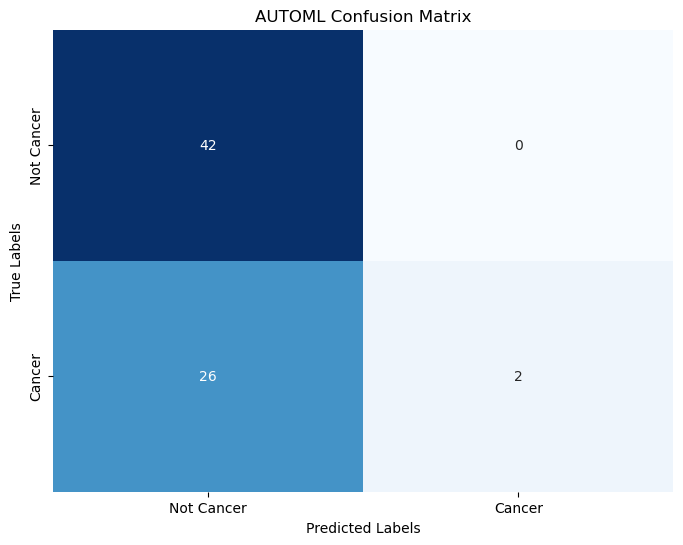

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# automl 모델의 confusion matrix 그리기
plt.figure(figsize=(8, 6))
automl_conf = confusion_matrix(y_test, pred)
sns.heatmap(automl_conf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("AUTOML Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(ticks=[0.5, 1.5], labels=["Not Cancer", "Cancer"])
plt.yticks(ticks=[0.5, 1.5], labels=["Not Cancer", "Cancer"])
plt.show()